In [1]:
import os
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt


os.chdir(r"C:\Users\PC\Desktop\Machine Learning\Datasets")

df = pd.read_csv("movie_review.csv")

In [2]:
#shape of the dataframe
print('The shape of the dataframe is :',df.shape)

#first few records
df.head()

#Checking for null values in `description`
df['text'].isnull().sum()


# Converting the Text to Lower Case
df['text']= df['text'].str.lower()
df['text'].head()

# Splitting and Removing Punctuation from the Text
splitted = df['text'].str.split(' ')
splitted.head()


cleaned_data = []

for text in splitted:
    text = [x.strip(string.punctuation) for x in text]
    cleaned_data.append(text)

cleaned_data[0]

text_spam = [" ".join(text) for text in cleaned_data]
final_text = " ".join(text_spam)
final_text[:500]

The shape of the dataframe is : (64720, 6)


"films adapted from comic books have had plenty of success  whether they're about superheroes  batman  superman  spawn   or geared toward kids  casper  or the arthouse crowd  ghost world   but there's never really been a comic book like from hell before  for starters  it was created by alan moore  and eddie campbell   who brought the medium to a whole new level in the mid 80s with a 12-part series called the watchmen  to say moore and campbell thoroughly researched the subject of jack the ripper "

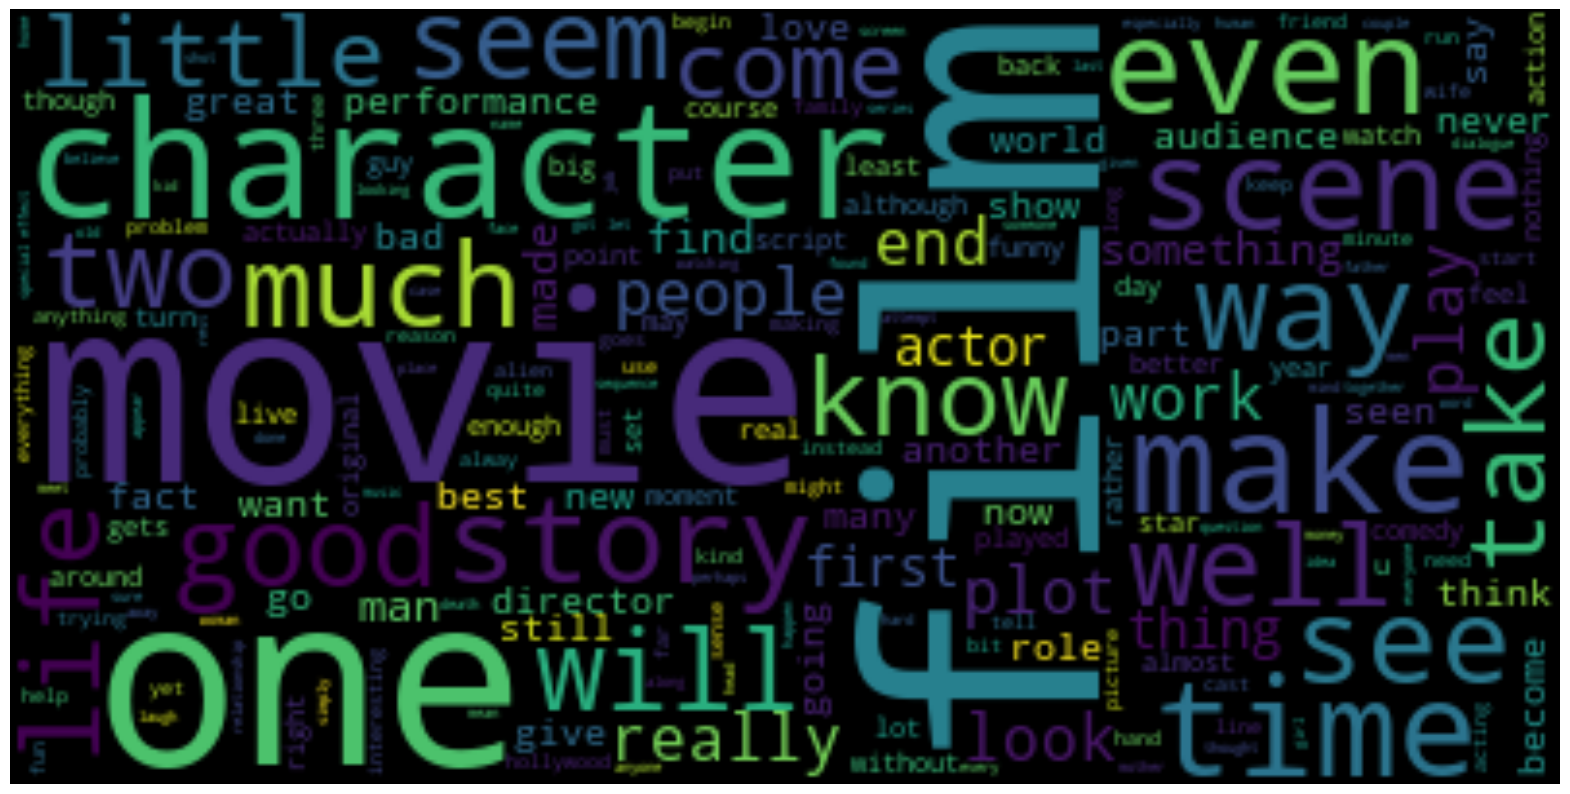

In [3]:
wordcloud_spam = WordCloud().generate(final_text)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []

    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass

    return ' '.join(returnVal).strip()

In [5]:
df['bigram_text'] = df["text"].apply(get_ngrams, n=2)

In [6]:
df["trigram_text"] = df["text"].apply(get_ngrams, n=3)

In [7]:
Bigram_string_list = df['bigram_text'].tolist()
bigram_string = ' '.join(Bigram_string_list)

In [8]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1,
                      background_color='black', colormap='Pastel1',
                      max_words = 75, collocations=False, normalize_plurals=False).generate(bigram_string)

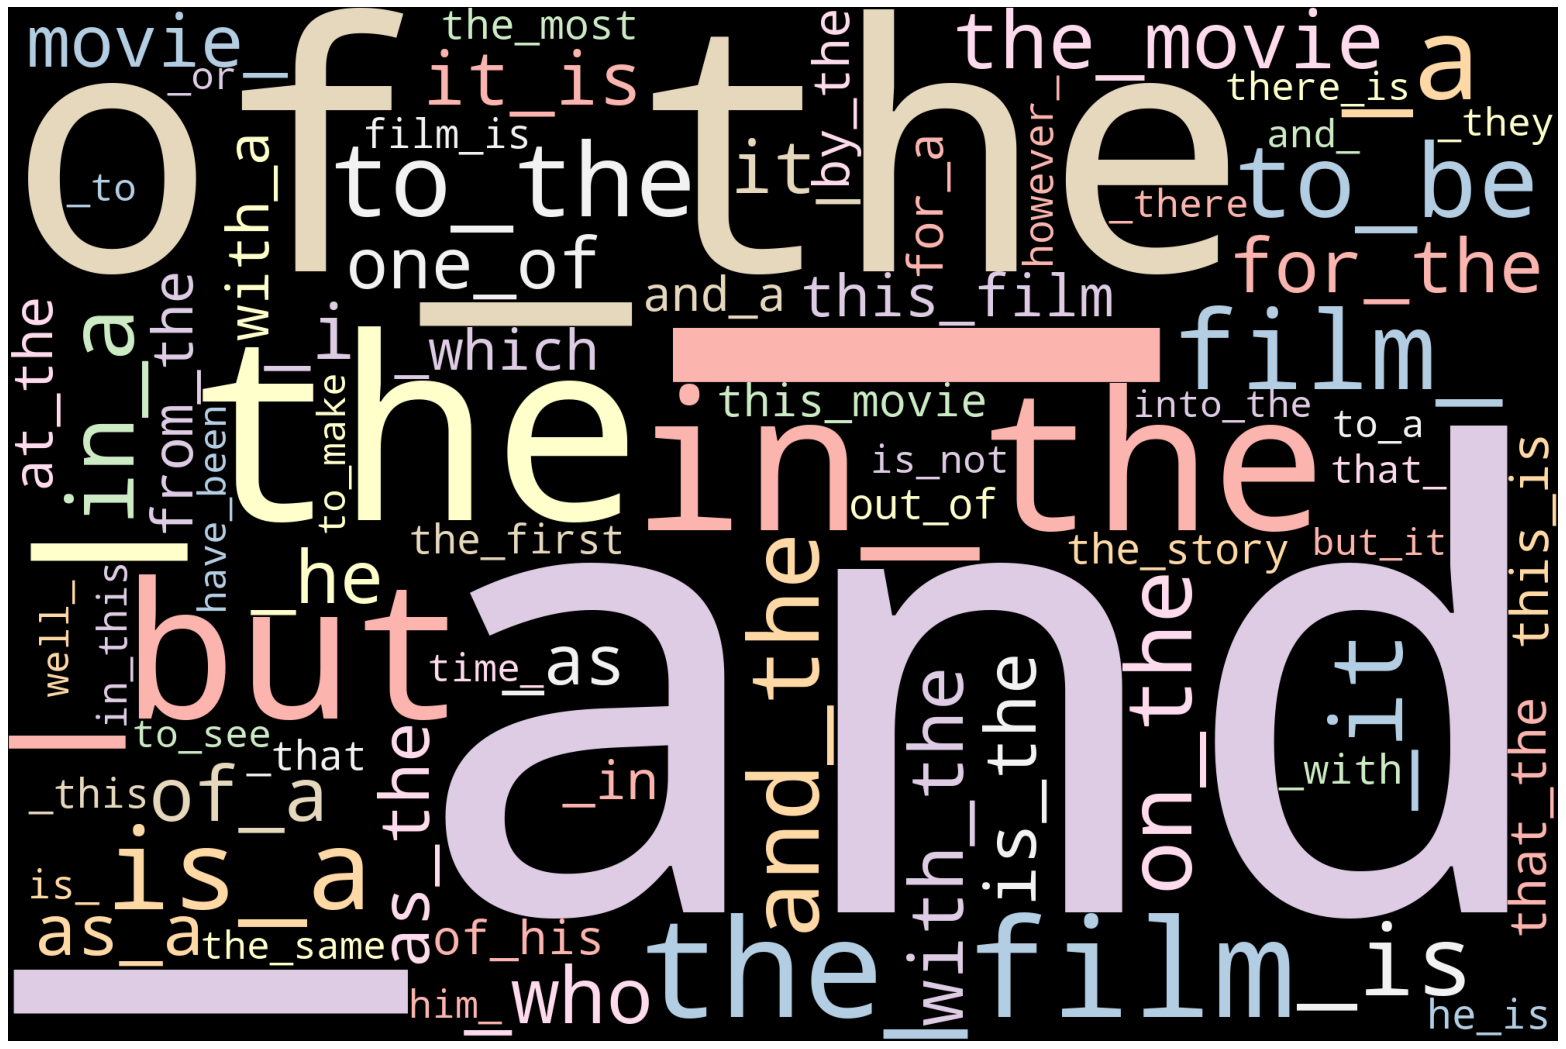

In [9]:
# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(25, 17), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()

#Plot
plot_cloud(wordcloud)

In [10]:
Trigram_string_list = df['trigram_text'].tolist()
Trigram_string = ' '.join(Trigram_string_list)

In [11]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1,
                      background_color='black', colormap='Pastel1',
                      max_words = 40, collocations=False, normalize_plurals=False).generate(Trigram_string)

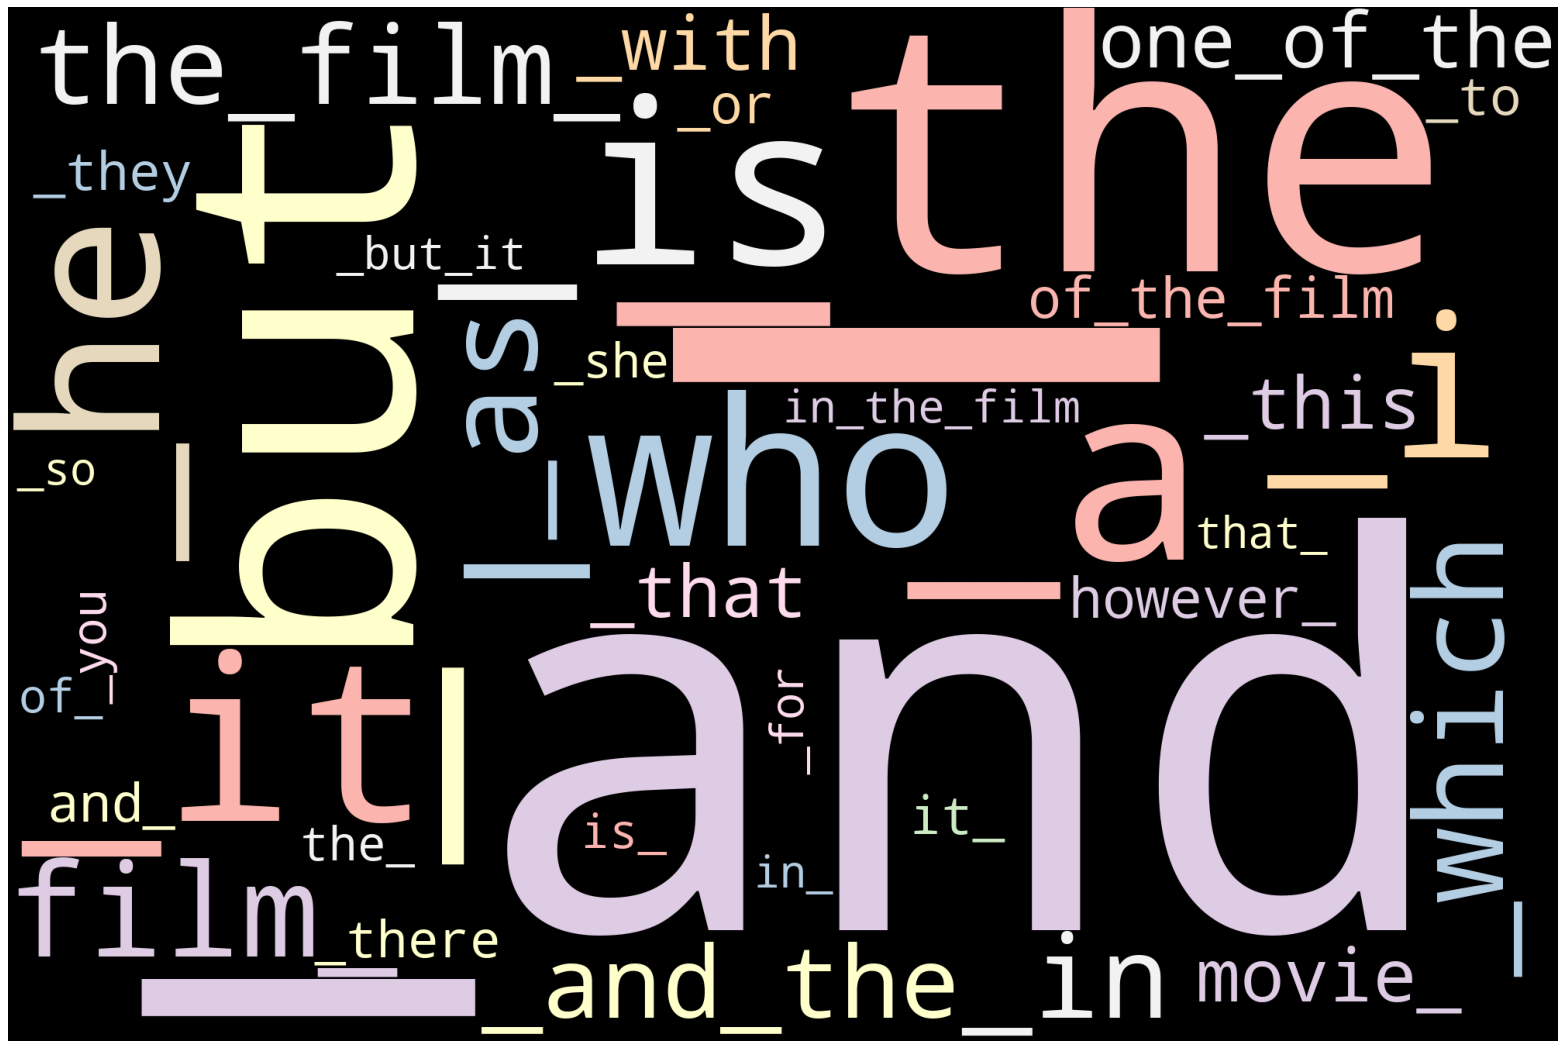

In [12]:
plot_cloud(wordcloud)